In [76]:
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline
import missingno as msno
import plotly.graph_objects as go

### Dataset loading for visualisation

In [77]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_covid_data=pd.read_csv(url, sep=',')

In [78]:
df_covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [79]:
df_covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [80]:
len(df_covid_data)

197465

In [81]:
df_covid_data.to_csv('../data/raw/covid_full_data_ourworldindata.csv')

In [82]:
len(df_covid_data['location'].unique())

244

In [83]:
df_covid_data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [84]:
#df_germany_data = df_covid_data[df_covid_data['location']=='Germany']
#df_india_data = df_covid_data[df_covid_data['location']=='India']
#df_sweden_data = df_covid_data[df_covid_data['location']=='Sweden']
        
#df_germany_data = df_germany_data.reset_index(drop=True)
#df_india_data = df_india_data.reset_index(drop=True)
#df_sweden_data = df_sweden_data.reset_index(drop=True)

#df_germany_data.loc[:, ('total_cases_per_population')] = df_germany_data.loc[:, ('total_cases')]/df_germany_data.loc[:,('population')]
#df_india_data.loc[:, ('total_cases_per_population')] = df_india_data.loc[:, ('total_cases')]/df_india_data.loc[:,('population')]
#df_sweden_data.loc[:, ('total_cases_per_population')] = df_sweden_data.loc[:, ('total_cases')]/df_sweden_data.loc[:,('population')]

In [85]:
country_array = ['Germany', 'India', 'Sweden']
color_array = ['green', 'blue', 'yellow']
df_dict = {}
least_count = 20000

for country, clr in zip(country_array, color_array):
    print(clr)
    df_dict[country] = df_covid_data[df_covid_data['location']==country]
    df_dict[country] = df_dict[country].reset_index(drop=True)
    df_dict[country].loc[:, ('total_cases_per_population')] = df_dict[country].loc[:, ('total_cases')]/df_dict[country].loc[:,('population')]
    df_dict[country].loc[:, ('fully_vaccinated_per_population')] = (df_dict[country].loc[:, ('people_fully_vaccinated')]/df_dict[country].loc[:,('population')])*100
    #df_dict[country].loc[:, ('plot_color')] = clr
    if least_count > len(df_dict[country]):
        least_count = len(df_dict[country])
        
print("Total number of days data - ",least_count)

#making all dataframes of same length
for country in country_array:
    if len(df_dict[country]) > least_count:
        remove_rows = len(df_dict[country]) - least_count
        print(remove_rows)
        df_dict[country] = df_dict[country][remove_rows:]
    


#for i, country in enumerate(country_array):
#    if i ==0:
#        final_df = pd.DataFrame({'date' : df_dict[country]['date']})
#    final_df[country] = df_dict[country]['total_cases_per_population']  
#print(final_df)

green
blue
yellow
Total number of days data -  879
5
2


In [86]:
#for country in country_array:
#    print(len(df_dict[country]))
#    print(df_dict[country]['date'])
#    print(df_dict[country]['total_cases_per_population'])

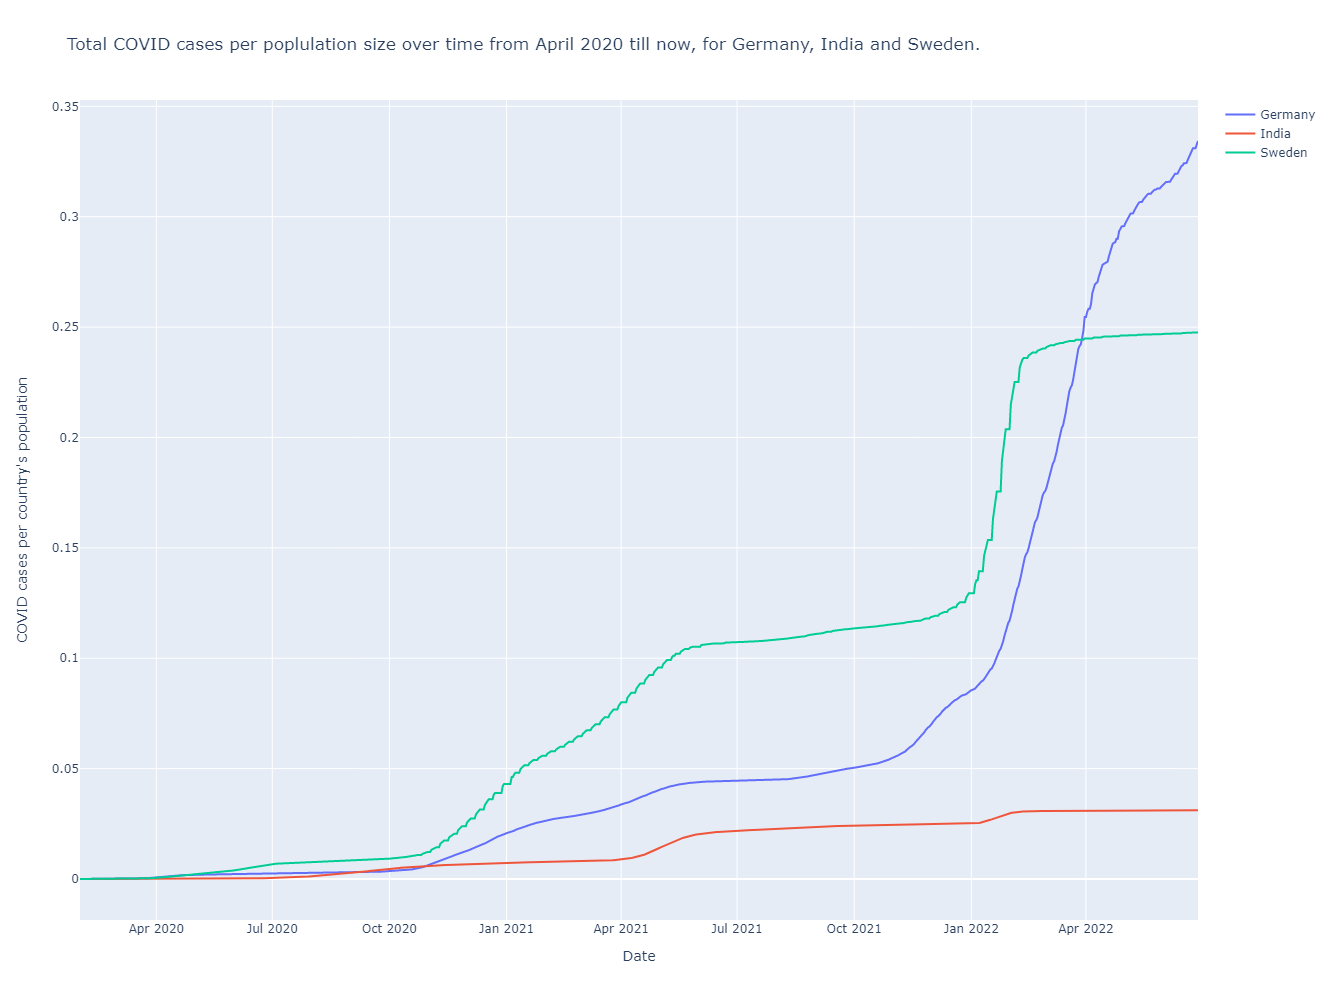

In [87]:
fig = go.Figure()
for country in country_array:
    fig.add_trace(go.Scatter(x=df_dict[country]['date'], y=df_dict[country]['total_cases_per_population'], name=country, mode="lines"))       
    #fig.add_trace(go.Scatter(x=final_df['date'], y=final_df[country], name=country, mode="lines"))       

#fig.update_yaxes(type="log")
fig.update_layout(width = 1200, height=1000, title="Total COVID cases per poplulation size over time from April 2020 till now, for Germany, India and Sweden.", xaxis_title="Date", yaxis_title="COVID cases per country's population")
fig.show()    
fig.write_image("../reports/figures/delivery1_log_results.jpeg")

### Delivery 2

In [88]:
for country in country_array:
    print(df_dict[country]['fully_vaccinated_per_population'])

5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
         ...    
879    75.491140
880    75.492250
881    75.492680
882    75.494083
883    75.497331
Name: fully_vaccinated_per_population, Length: 879, dtype: float64
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
         ...    
876    65.287711
877    65.359409
878    65.408050
879    65.432878
880    65.508581
Name: fully_vaccinated_per_population, Length: 879, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
874   NaN
875   NaN
876   NaN
877   NaN
878   NaN
Name: fully_vaccinated_per_population, Length: 879, dtype: float64


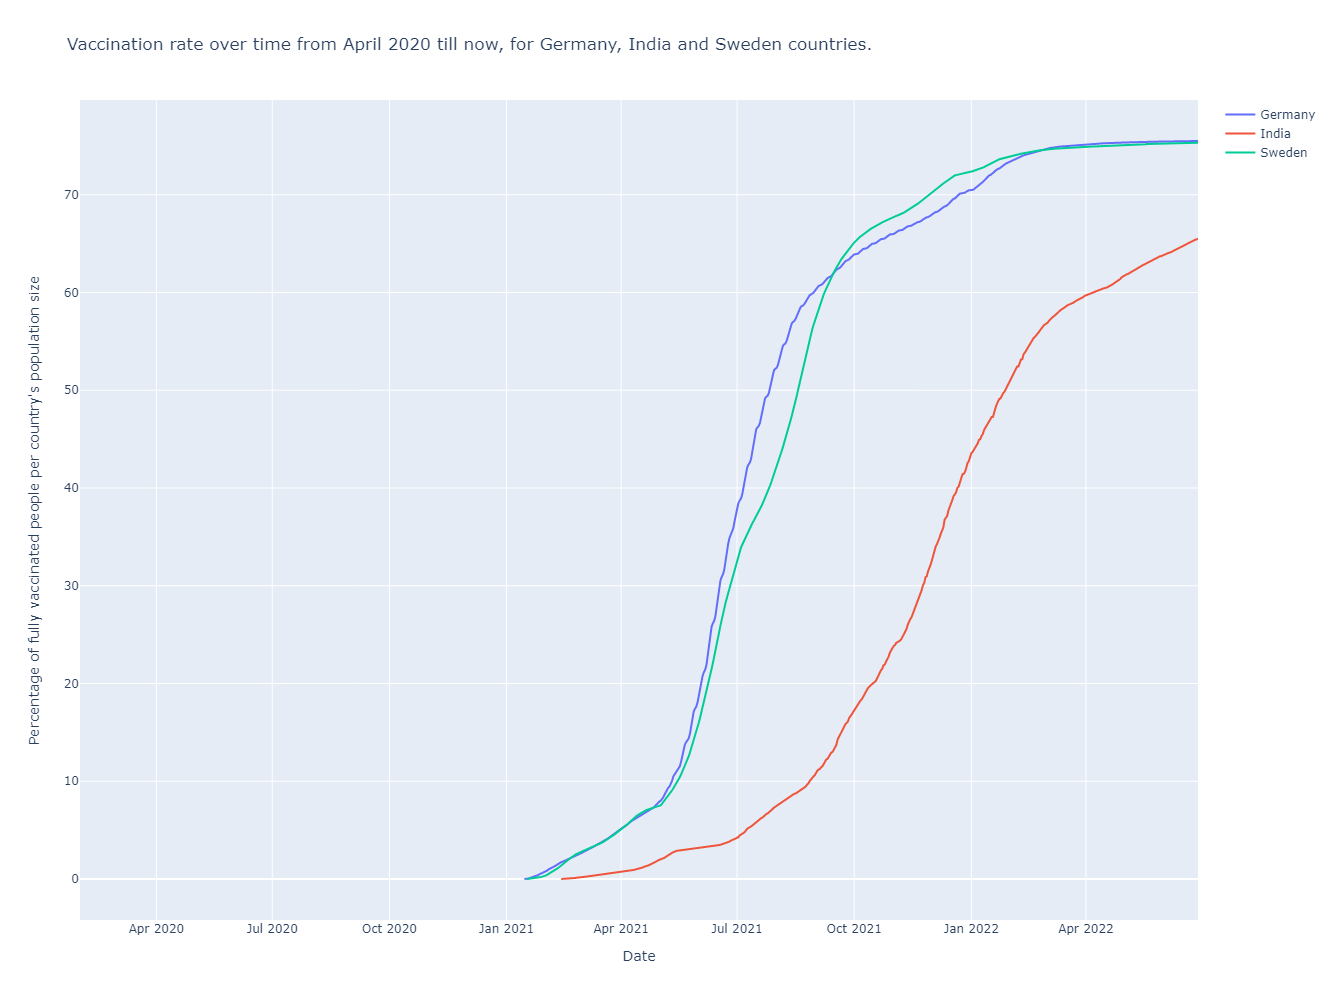

In [89]:
fig = go.Figure()
for country in country_array:
    fig.add_trace(go.Scatter(x=df_dict[country]['date'], y=df_dict[country]['fully_vaccinated_per_population'].interpolate(method='linear'), name=country, mode="lines"))       
    #fig.add_trace(go.Scatter(x=final_df['date'], y=final_df[country], name=country, mode="lines"))       

#fig.update_yaxes(type="log")
fig.update_layout(width = 1200, height=1000, title="Vaccination rate over time from April 2020 till now, for Germany, India and Sweden countries.", xaxis_title="Date", yaxis_title="Percentage of fully vaccinated people per country's population size")
fig.show()    
fig.write_image("../reports/figures/delivery2_results.jpeg")